In [11]:
from upscaler.model import make_upscaler_skip_con, make_upscaler_orig

Using TensorFlow backend.


In [6]:
input_image_shape = (480,270,3)
u = make_upscaler_orig(input_image_shape)

In [7]:
u.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 480, 270, 3)  0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 480, 270, 64) 15616       input_2[0][0]                    
__________________________________________________________________________________________________
p_re_lu_18 (PReLU)              (None, 480, 270, 64) 64          conv2d_36[0][0]                  
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 480, 270, 64) 36928       p_re_lu_18[0][0]                 
__________________________________________________________________________________________________
batch_norm

In [12]:
from upscaler.data import load_train_test_data, load_data_rescale
from tqdm import tqdm
from skimage import data, io

In [13]:
output_image_shape = (1920,1080,3)
input_image_shape = (480,270,3)

In [14]:
x_train_lr, x_train_hr, x_test_lr, x_test_hr = load_train_test_data('../images/ukiyo-e_fullhd', '.jpg', 20, 0.9, input_image_shape, prog_func=tqdm)

Converting to low-res: 100%|██████████| 2/2 [00:00<00:00, 43.45it/s]


In [15]:
ex = x_train_lr[2]
ex = (ex + 1)/2
io.imshow(ex)

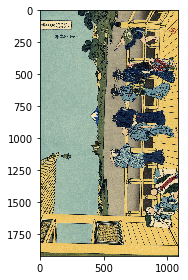

In [5]:
ex = x_train_hr[2]
ex = (ex + 1)/2
io.imshow(ex)

In [6]:
dat_lr, dat_hr = load_data_rescale('../images/ukiyo-e_fullhd', '.jpg', 20, input_image_shape, prog_func=tqdm)

Converting to low-res: 100%|██████████| 20/20 [00:00<00:00, 42.56it/s]


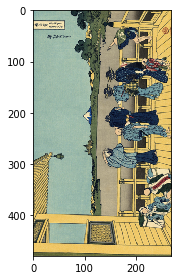

In [7]:
ex = dat_lr[2]
ex = (ex + 1)/2
io.imshow(ex)

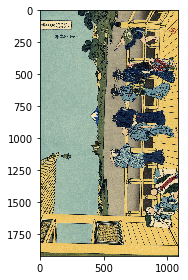

In [8]:
ex = dat_hr[2]
ex = (ex + 1)/2
io.imshow(ex)

# benchmarks

In [28]:
import math
import numpy as np
from PIL import Image

In [29]:
round(math.log(4,2))

2

In [70]:
%%time

ex = x_train_hr[2]
img_ar = np.uint8(np.around((ex + 1) * 127.5))

CPU times: user 29.1 ms, sys: 4.35 ms, total: 33.5 ms
Wall time: 32.2 ms


In [71]:
%%time

img = Image.fromarray(img_ar)

CPU times: user 53.6 ms, sys: 1.52 ms, total: 55.1 ms
Wall time: 54 ms


In [72]:
%%time

img = img.resize(
    [480,270],
    resample=Image.BICUBIC
)

CPU times: user 25.4 ms, sys: 2.37 ms, total: 27.8 ms
Wall time: 26.6 ms


In [74]:
%%time

img = img.transpose(Image.FLIP_LEFT_RIGHT)

CPU times: user 396 µs, sys: 216 µs, total: 612 µs
Wall time: 1.07 ms


In [81]:
%%time

a = np.array(img)
a = (a - 127.5)/2

CPU times: user 1.57 ms, sys: 1.05 ms, total: 2.62 ms
Wall time: 1.71 ms


# data loading

In [1]:
from upscaler.data import load_images_from_dir_and_downscale, split_images_train_test
from upscaler.data import select_random_rows, convert_imagesdf_to_arrays, convert_array_to_image
from tqdm import tqdm_notebook
import numpy as np

In [2]:
images = load_images_from_dir_and_downscale("../images/ukiyo-e_fullhd", ".jpg", 10, downscale_factor=4, prog_func = tqdm_notebook)

In [3]:
images_train, images_test = split_images_train_test(images, 0.8)

In [32]:
images_train.image_lr[0:2]

0    <PIL.Image.Image image mode=RGB size=480x270 a...
1    <PIL.Image.Image image mode=RGB size=480x270 a...
Name: image_lr, dtype: object

In [4]:
%time

subdf = select_random_rows(images_train, 2)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


In [9]:
%time

array_hr, array_lr = convert_imagesdf_to_arrays(subdf)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [10]:
array_hr.shape

(2, 1920, 1080, 3)

In [11]:
array_lr.shape

(2, 480, 270, 3)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


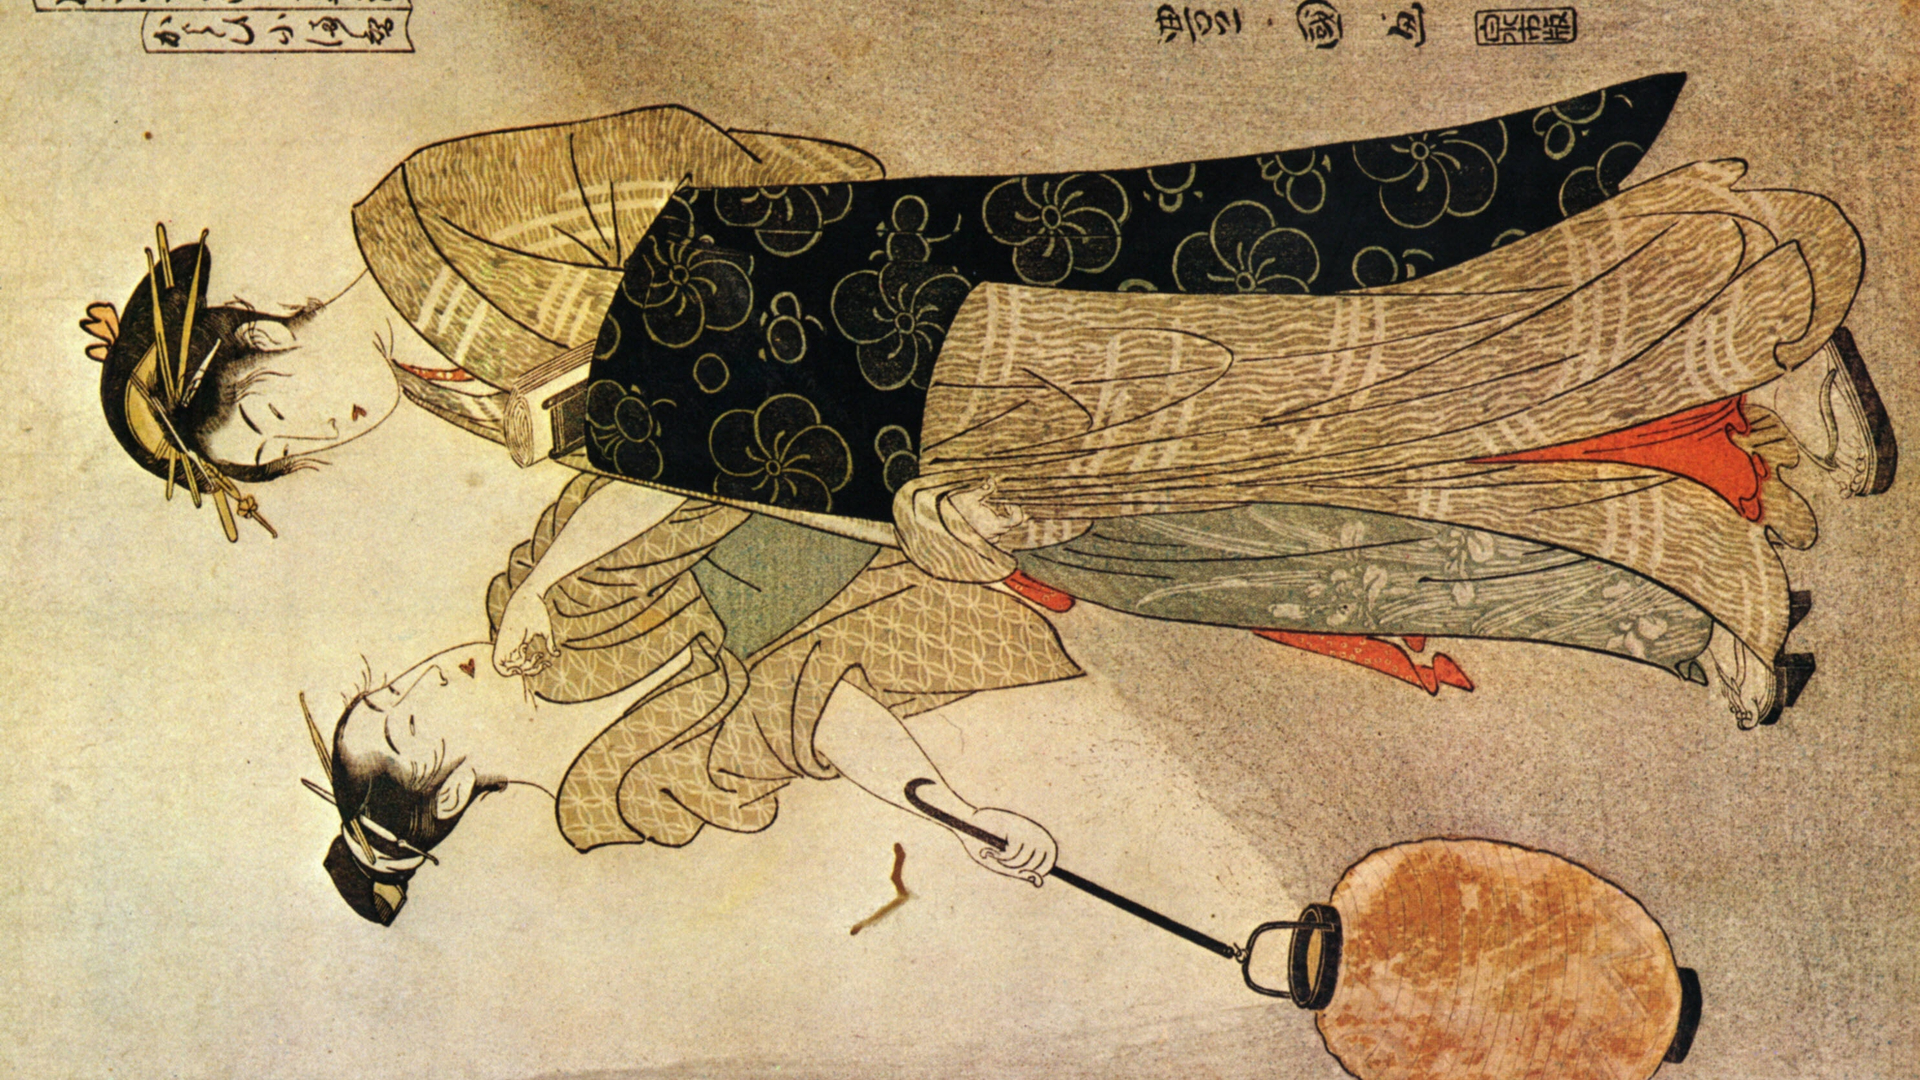

In [12]:
%time

convert_array_to_image(array_hr[0])

In [33]:
for i in range(0,1):
    print(str(i))

0


In [34]:
import json

In [42]:
json.dumps({'a':1, 'b':[1,2,3], 'c': ('x',5)})

'{"a": 1, "b": [1, 2, 3], "c": ["x", 5]}'